The purpose of this notebook is to show how to **read and process** some research data using xarray library.

See xarray documentation here: (https://docs.xarray.dev/en/stable/index.html)


# general imports

In [1]:
# We need to import some Python libraries here first.

import os
import sys
import shutil
import scipy

import numpy as np
import xarray as xr

import PIL # python image library for reading tiff files

In [2]:
# It would be good to have interactive plots if ipympl is installed.
# See: https://matplotlib.org/ipympl/

%matplotlib inline

# importing matplotlib for plots.
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

# setting up the example data path

In [3]:
# We assume this notebook and its data is on Google Drive so that we can use Google Colab.
# Otherwise, replace XXX with the exact path where this notebook (000.read_research_data_into_python.ipynb)
# and its data folder (000.read_research_data_into_python.data) is.

try:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('/content/drive/MyDrive/SULI-2024/repositories/pySULI/notebooks/')
except Exception as exc:
    print(exc)
    os.chdir('.')

No module named 'google'


In [4]:
# Assuming 000.read_research_data_into_python.data and 000.read_research_data_into_python.ipynb are here.

here = os.getcwd()
example_data_path = '001.learn_xarray.data'

# navigate into example_data_path directory
os.chdir(example_data_path)

os.listdir('.')

['NIST-LaB6.tiff']

# reading a tiff image file as a numpy array and plotting without using xarray
(This is an inefficient way and you will see why later)

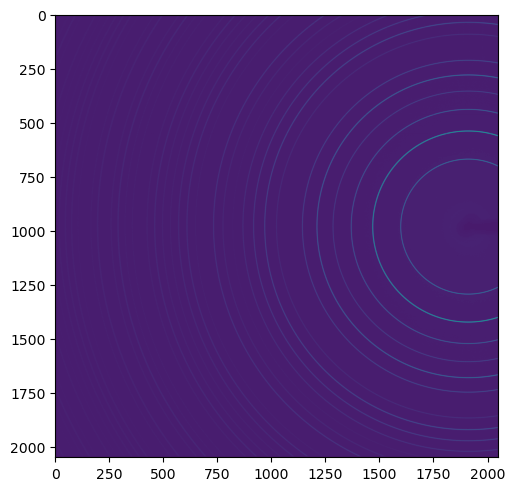

In [5]:
# first we need to read image as numpy array
img = np.array(PIL.Image.open('NIST-LaB6.tiff'))

# then plot using imshow
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(img)
ax.set_aspect('equal')

# reading a tiff image file as xarray dataarray and plotting with xarray.

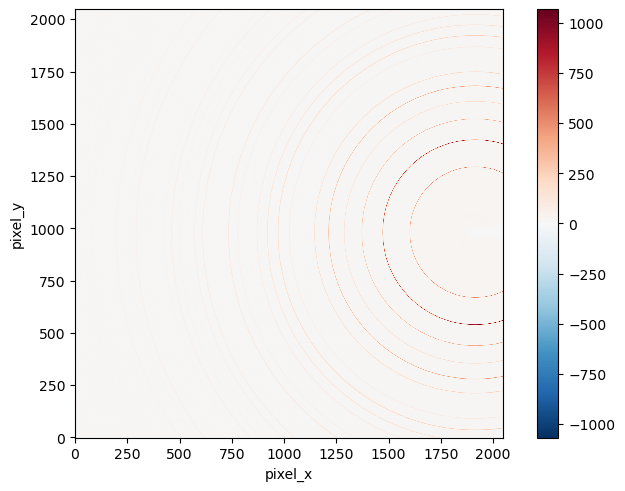

In [6]:
# first we need to read image as numpy array
img = np.array(PIL.Image.open('NIST-LaB6.tiff'))


# then we create an xarray DataArray object
da = xr.DataArray(data=img,
                  coords=[np.arange(img.shape[0]),np.arange(img.shape[1])],
                  dims=['pixel_y', 'pixel_x'])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
da.plot.imshow(ax=ax) # this line does the plotting for us and adds colorbar and figure axis labels.
ax.set_aspect('equal')

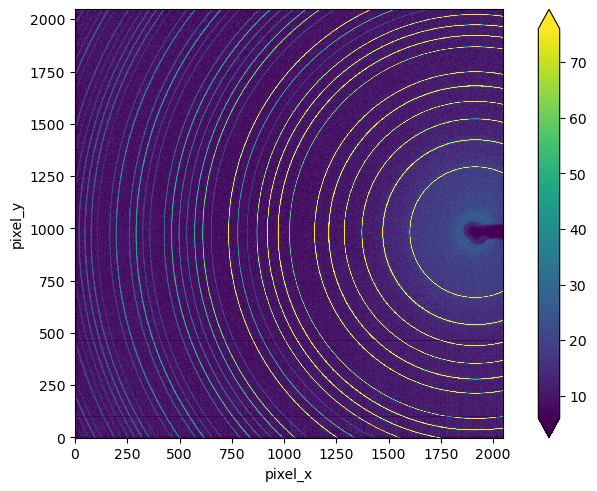

In [7]:
# one of the most useful plotting keywords of xarray is "robust".
# By setting robust=True, we can see the image in a better coloring scale
# without any additional user input.

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
da.plot.imshow(ax=ax,robust=True)
ax.set_aspect('equal')

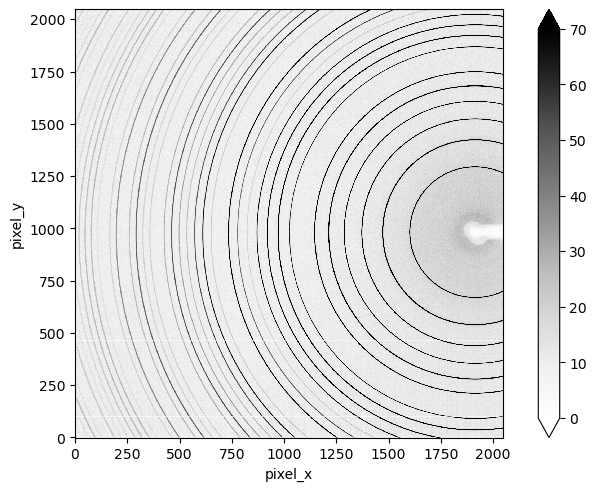

In [8]:
# We can easily change the color map and set the vmin value to 0

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
da.plot.imshow(ax=ax,robust=True,cmap = 'Greys', vmin=0, vmax=70)
ax.set_aspect('equal')

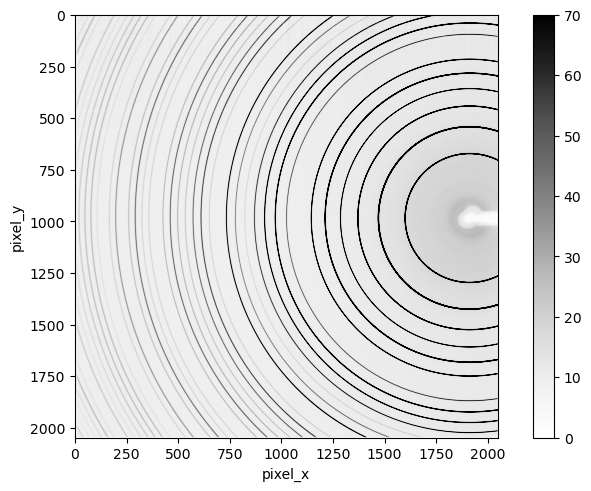

In [9]:
# in order to get above plot, we need to add some manual stuff

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
im = ax.imshow(img,vmin=0,vmax=70,cmap='Greys') # we learned 70 here from xarray plot

# --- xarray plotting does these for us automatically 
cb = fig.colorbar(im) 
ax.set_xlabel('pixel_x')
ax.set_ylabel('pixel_y')
# ---------------------------------------------------

ax.set_aspect('equal')

# NOTE: There are some detector defects on the image. 
# See horizontal lines on pixel_x = 102 & pixel_y = 465 in xarray plot above.
# But those lines are not seen on this plot.

Adding x,y labels or colorbar is not only advantage of xarray. There are plenty of more\
functionality that are not easy with using standard numpy and matplotlib functions.\
Examples below show some of those functionalities.

# more examples with xarray

Text(0.5, 1.0, 'around beam stop')

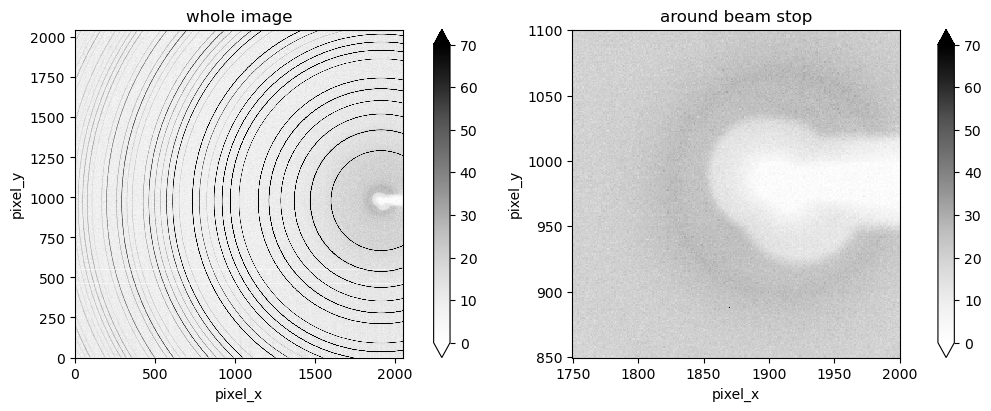

In [10]:
# The features around pixel_x=1910, pixel_y=980 are coming from beam stop.
# We can easily zoom in those areas in a second plot

fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(1,2,1)
da.plot.imshow(ax=ax,robust=True,cmap = 'Greys', vmin=0, vmax=70)
ax.set_aspect('equal')
ax.set_title('whole image')


ax = fig.add_subplot(1,2,2)
da_sel = da.sel(pixel_x=slice(1750,2000)).sel(pixel_y=slice(850,1100))
da_sel.plot.imshow(ax=ax,robust=True,cmap = 'Greys', vmin=0, vmax=70)
ax.set_aspect('equal')
ax.set_title('around beam stop')

Text(0.5, 1.0, 'showing detector bad pixels')

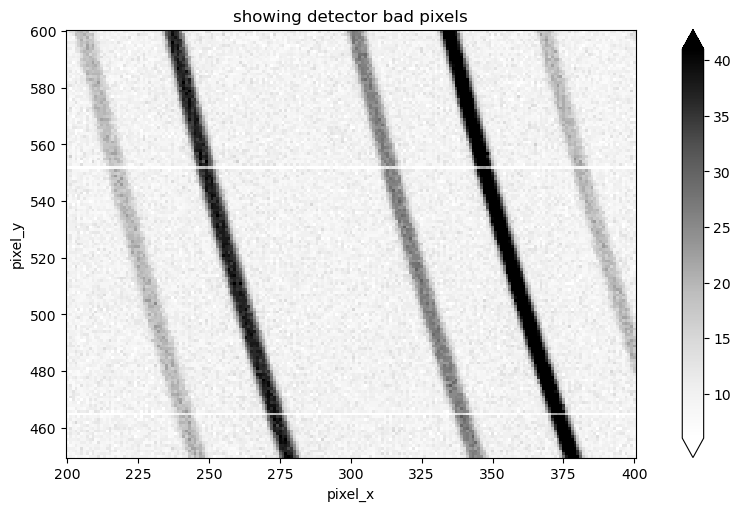

In [11]:
# Same as above for detector artefacts

fig = plt.figure(figsize=(8,5))


ax = fig.add_subplot(1,1,1)
da_sel = da.sel(pixel_x=slice(200,400)).sel(pixel_y=slice(450,600))
da_sel.plot.imshow(ax=ax,robust=True,cmap = 'Greys')
ax.set_aspect('equal')
ax.set_title('showing detector bad pixels')

Text(0.5, 1.0, 'intensity profile along red line on the left\n(see intensity drop along the detector defect)')

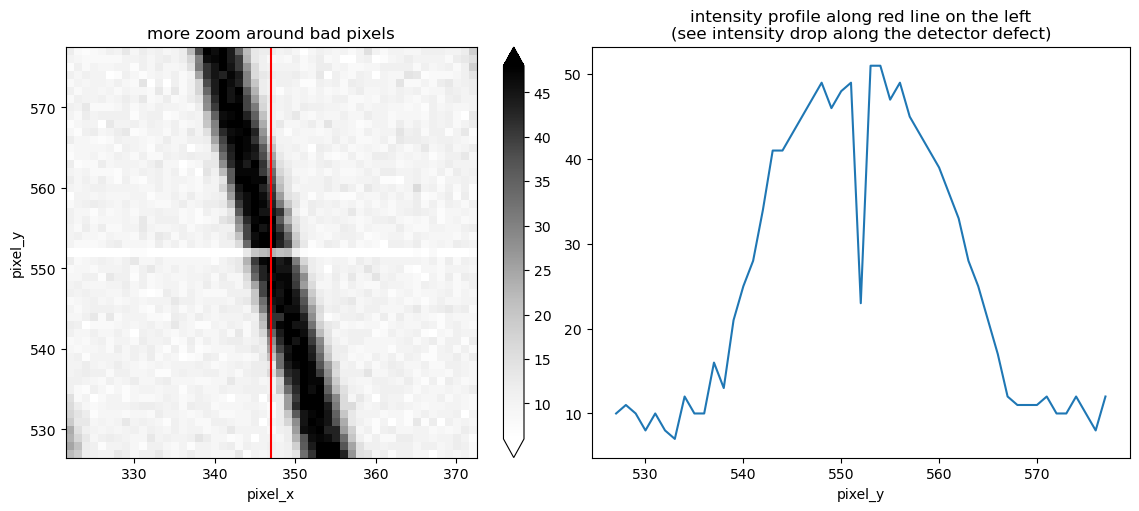

In [12]:
# here we further zoom into defects and get line profile

fig = plt.figure(figsize=(12,5))


ax = fig.add_subplot(1,2,1)
da_sel = da.sel(pixel_x=slice(347-25,347+25)).sel(pixel_y=slice(552-25,552+25))
da_sel.plot.imshow(ax=ax,robust=True,cmap = 'Greys')
ax.axvline(x=347,color='r')
ax.set_aspect('equal')
ax.set_title('more zoom around bad pixels')

ax = fig.add_subplot(1,2,2)
da_sel.sel(pixel_x=347,method='nearest').plot()
ax.set_title('intensity profile along red line on the left\n(see intensity drop along the detector defect)')


(0.0, 2048.0)

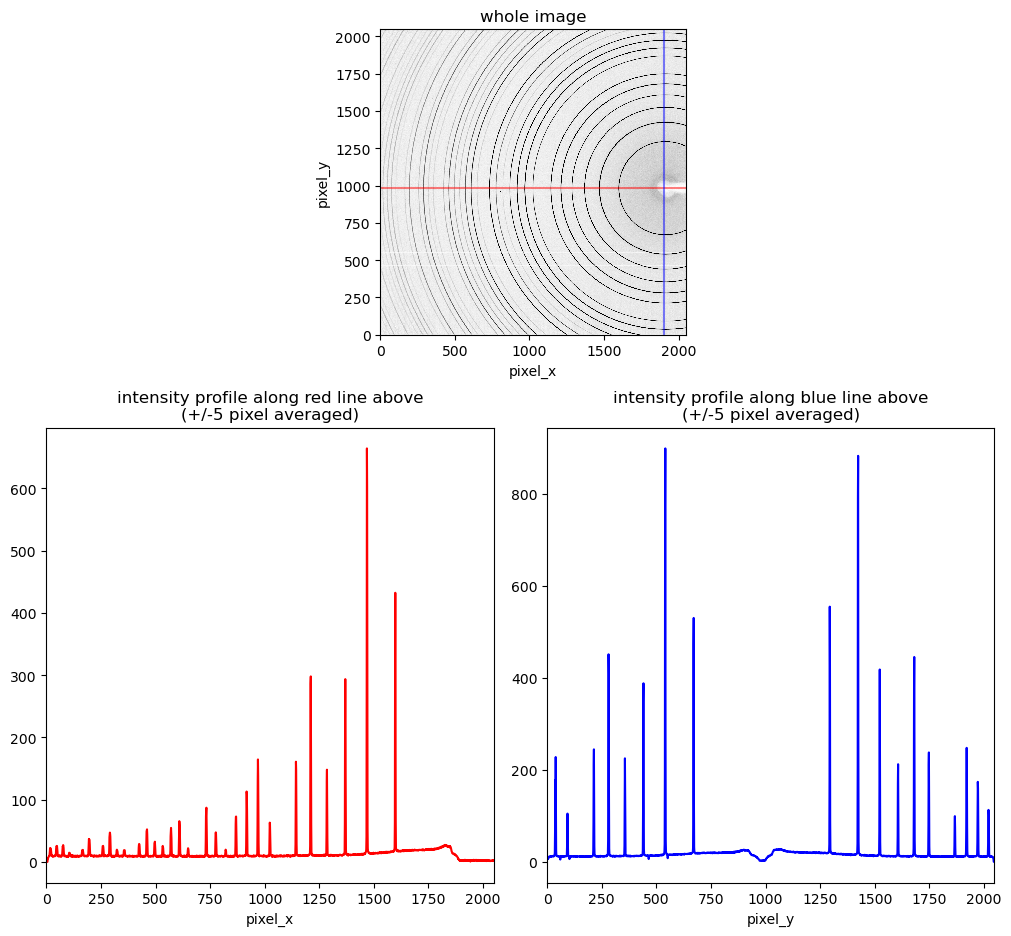

In [13]:
# This is similar way of selecting and averaging profile

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(2,3,2)
da.plot.imshow(ax=ax,robust=True,cmap = 'Greys', vmin=0, vmax=70,add_colorbar=False)
ax.axhline(y=983,color='r',alpha=0.5)
ax.axvline(x=1900,color='b',alpha=0.5)
ax.set_aspect('equal')
ax.set_title('whole image')


ax = fig.add_subplot(2,2,3)
da_sel = da.sel(pixel_y=slice(983-5,983+5)).mean(dim='pixel_y') # here we first select and then average
da_sel.plot(ax=ax,color='r')
ax.set_title('intensity profile along red line above\n(+/-5 pixel averaged)')
ax.set_xlim([0,2048])

ax = fig.add_subplot(2,2,4)
da_sel = da.sel(pixel_x=slice(1900-5,1900+5)).mean(dim='pixel_x') # here we first select and then average
da_sel.plot(ax=ax,color='b')
ax.set_title('intensity profile along blue line above\n(+/-5 pixel averaged)')
ax.set_xlim([0,2048])

In [14]:
# here is a much more advanced example. 
# How can we get a line profile between two points? 
# For example from (pixel_x,pixel_y)=(1900,983) to (pixel_x,pixel_y)=(10,2000) ?

## task for Peter and Kevin
## I think you shuld start from here https://docs.xarray.dev/en/latest/user-guide/interpolation.html